# A demo to annotate an HCC dataset(Lu2022) by LiverCT

Yuhan Fan, 2023/08/13


In [1]:
import os
import gdown
import shutil
import warnings
warnings.filterwarnings("ignore")

from liverct_annot import *

INFO:pytorch_lightning.utilities.seed:Global seed set to 0
 captum (see https://github.com/pytorch/captum).


### download trained models from zenodo

In [2]:
output_folder = "../test_folder/"
extract_dir = "../test_folder/LiverCT_models/"

In [3]:
url = "https://zenodo.org/record/8239570/files/models.zip"
os.makedirs(output_folder)
gdown.download(url, output_folder + "LiverCT_models.zip", quiet=False)

shutil.unpack_archive(output_folder + "LiverCT_models.zip", extract_dir=extract_dir)
os.remove(output_folder + "LiverCT_models.zip")

Downloading...
From: https://zenodo.org/record/8239570/files/models.zip
To: /home/wyh/liver_atlas/code/test_folder/LiverCT_models.zip
100%|██████████| 70.2M/70.2M [00:06<00:00, 10.4MB/s]


### download query dataset

Download a query dataset Lu2022 (https://doi.org/10.1038/s41467-022-32283-3).

In [5]:
url = "https://zenodo.org/record/13380493/files/Lu2022_subsampled.h5ad"
gdown.download(url, output_folder + "Lu2022_subsampled.h5ad", quiet=False)

Downloading...
From: https://zenodo.org/record/13380493/files/Lu2022_subsampled.h5ad
To: /home/wyh/liver_atlas/code/test_folder/Lu2022_subsampled.h5ad
100%|██████████| 333M/333M [00:27<00:00, 12.1MB/s] 


'../test_folder/Lu2022_subsampled.h5ad'

In [6]:
adata = sc.read_h5ad(output_folder + "Lu2022_subsampled.h5ad")
adata

AnnData object with n_obs × n_vars = 10000 × 25712
    obs: 'Age', 'Author', 'Cell_ID', 'Disease', 'Fibrotic_status', 'GEO_accession', 'Gender', 'Original_name_global', 'Original_name_sub', 'Patient_ID', 'Sample_ID', 'Sample_status', 'Sample_status_original', 'Seq_tech', 'Source', 'State', 'TNM', 'Virus_infection', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'leiden', 'Level1', 'batch', 'level1'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Level1_colors', 'Original_name_global_colors', 'Original_name_sub_colors', 'Patient_ID_colors', 'Sample_ID_colors', 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

### Annotate cell types and intermediate/deviated states

In [7]:
res, latent = cell_states_annot(model_dir=extract_dir + "models/",
                                adata_test=adata, finetune_epoch=20)
res

Performing gene symbol uniform, this step may take several minutes


Processing: 100%|██████████| 25712/25712 [01:19<00:00, 325.17it/s]


Finished


Processing: 100%|██████████| 19625/19625 [00:06<00:00, 3185.14it/s]


INFO     Using data from adata.layers["counts"]                                              


INFO:scvi.data._anndata:Using data from adata.layers["counts"]


INFO     Registered keys:['X', 'batch_indices', 'labels']                                    


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'labels']


INFO     Successfully registered anndata object containing 10000 cells, 2000 vars, 22        
         batches, 9 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  


INFO:scvi.data._anndata:Successfully registered anndata object containing 10000 cells, 2000 vars, 22 batches, 9 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Training for 20 epochs.                                                             


INFO:scvi.model._scanvi:Training for 20 epochs.
INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 20/20: 100%|██████████| 20/20 [00:33<00:00,  1.69s/it, loss=1.23e+03, v_num=1]
2024-08-27 23:23:56.055774 Test set feature selection start
Normalization has been escaped.
2024-08-27 23:23:56.055892 Test set lv1 predict start...
2024-08-27 23:23:56.916304 Test set lv2 predict start...
2024-08-27 23:23:56.937394 B cell lv2 predict...
B cell predict is finished in 0.024609
2024-08-27 23:23:56.962105 Cholangiocyte lv2 predict...
Cholangiocyte predict is finished in 0.026237
2024-08-27 23:23:56.988429 Endothelial cell lv2 predict...
Endothelial cell predict is finished in 0.142721
2024-08-27 23:23:57.131230 Hepatocyte lv2 predict...
Hepatocyte predict is finished in 0.023342
2024-08-27 23:23:57.154639 Mesenchymal cell lv2 predict...
Mesenchymal cell predict is finished in 0.150407
2024-08-27 23:23:57.305127 Myeloid cell lv2 predict...
Myeloid cell predict is finished in 0.380923
2024-08-27 23:23:57.686159 Plasma B cell lv2 predict...
Plasma B cell predict is finished in 0.014293
2024-

,pred_lineage,pred_lv1,pred_lv2,intermediate_score,deviated_score,intermediate_state,deviated_state,proba_lv1,voting_lv2_1,voting_lv2_2,suggest_label_lv1,suggest_label_lv2,suggest_label_lineage
HCC08T_GCCTCTATCCAATGGT,Lymphoid,TNK cell,CD4,0.744414,1.000000,intermediate,deviated,0.990418,CD4,CD8,TNK cel,CD4,TNK cel
HCC08N_ACATCAGGTAGCAAAT,Lymphoid,TNK cell,NK,0.581747,0.015823,intermediate,deviated,0.992447,NK,CD8,TNK cel,NK,TNK cel
HCC09T_ACCTTTACAATAGCAA,Lymphoid,TNK cell,CD4,0.823543,-0.317894,intermediate,non-deviated,0.997744,CD4,CD8,TNK cel,CD4,TNK cel
HCC01T_CCACCTATCCTCTAGC,Myeloid,Myeloid cell,Kupffer,0.471169,-0.214267,intermediate,non-deviated,0.916832,Kupffer,Mono,Myeloid,Macro,Myeloid
HCC07T_CGAGCACCAGACGCCT,Myeloid,Myeloid cell,Kupffer,0.755891,0.558038,intermediate,deviated,0.967732,Kupffer,Mono,Myeloid,Macro,Myeloid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCC03N_CCTAGCTGTGTAACGG,Endothelial,Endothelial cell,LSEC,0.585939,-0.830509,intermediate,non-deviated,0.993573,LSEC,VEC,Endothe,LSEC,Endothe
HCC04N_ACACCCTGTCGAATCT,Lymphoid,Plasma B cell,Plasma,0.000000,-1.000000,non-intermediate,non-deviated,0.976341,Plasma,Unclassified,Plasma,Plasma,Plasma
HCC08T_GAAGCAGCAATCCGAT,Lymphoid,TNK cell,CD4,0.859007,0.570985,intermediate,deviated,0.963773,CD4,CD8,TNK cel,CD4,TNK cel
HCC01T_AGCCTAAGTCTGCGGT,Lymphoid,TNK cell,CD8,0.477682,1.000000,intermediate,deviated,0.583645,CD8,NK,Unknown,Unknown,Unknown


# Visualize annotation results

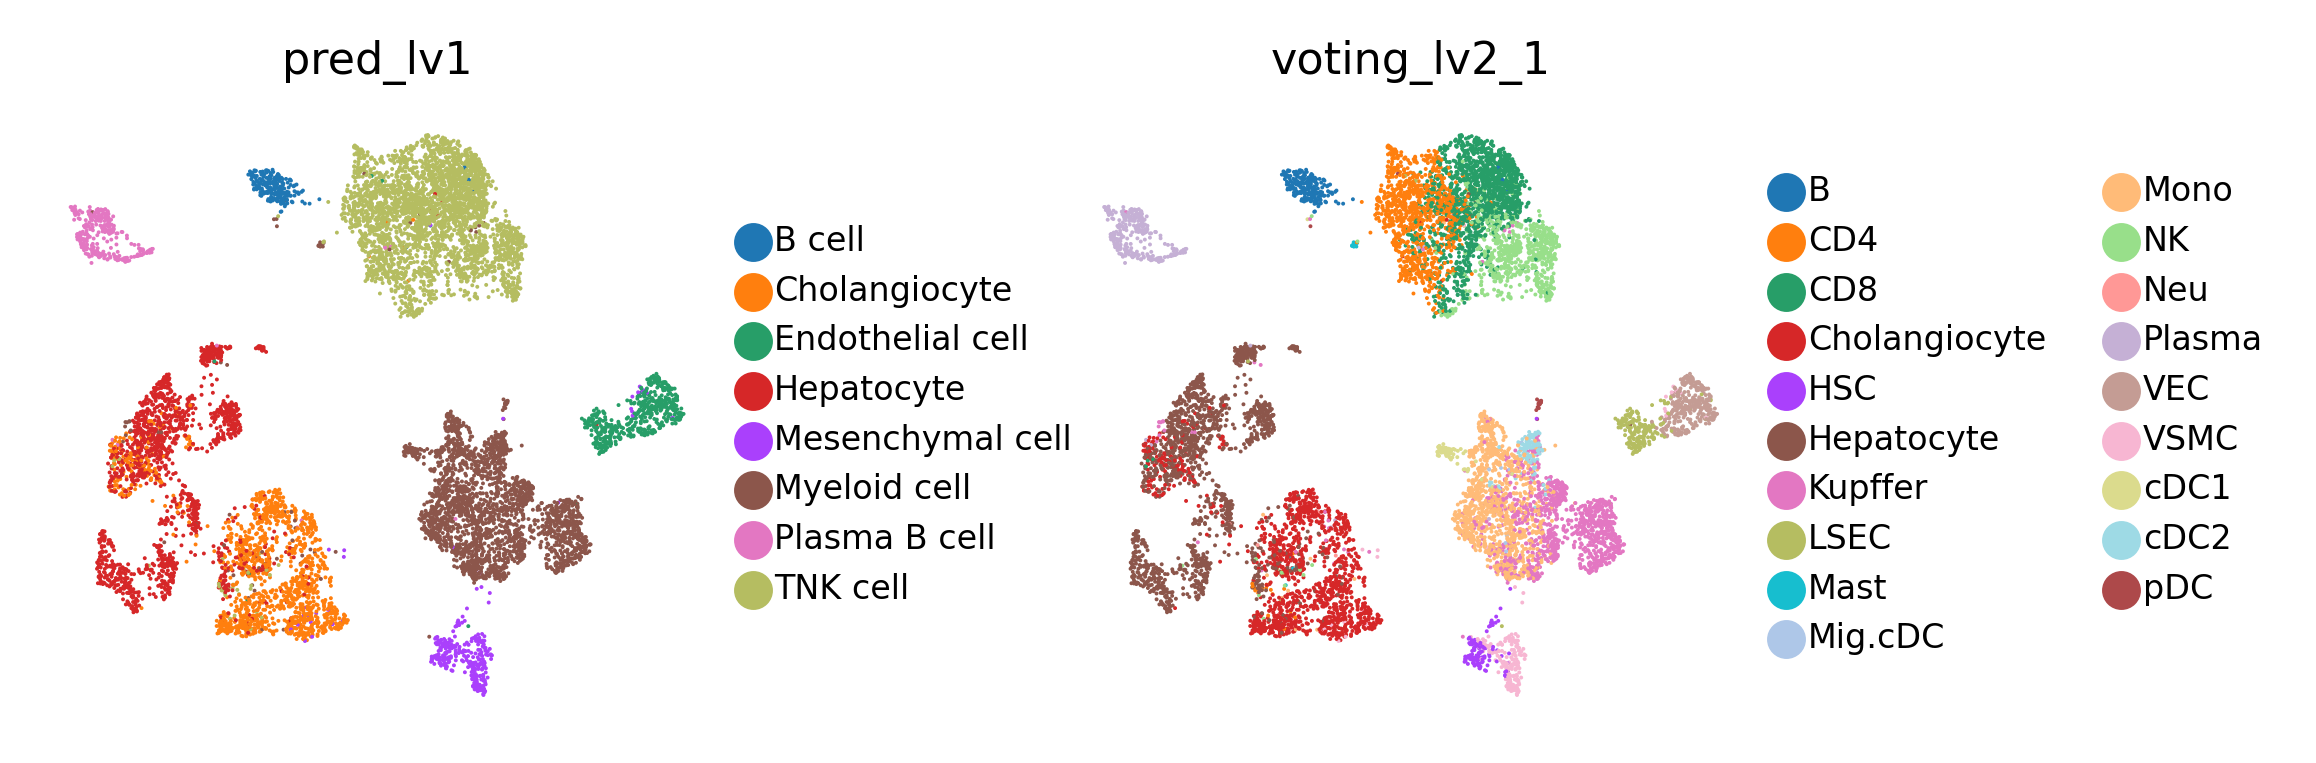

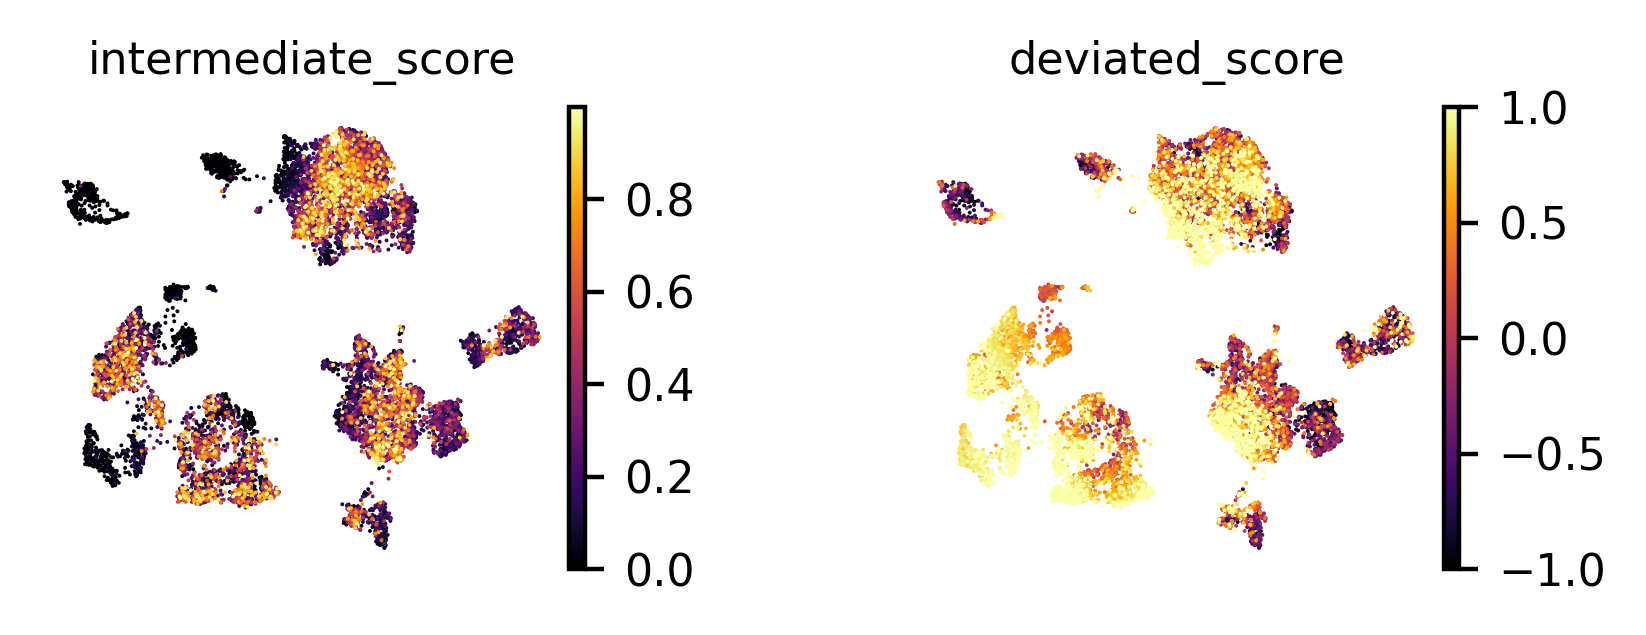

In [8]:
latent.obs = pd.concat([adata.obs, res], axis=1)
sc.pp.neighbors(latent, use_rep='X')
sc.tl.umap(latent)

sc.settings.set_figure_params(dpi=200, figsize=(2,2), frameon=False, fontsize=8)
sc.pl.umap(latent, color=['pred_lv1', 'voting_lv2_1'], size=20000 / latent.n_obs, legend_fontsize=6)

sc.settings.set_figure_params(dpi=200, figsize=(1.5,1.5), frameon=False, fontsize=8)
sc.pl.umap(latent, color=['intermediate_score', 'deviated_score'],
           size=20000 / latent.n_obs, legend_fontsize=6, color_map='inferno')

### Annotate hepatocyte zonation groups

In [9]:
# select cells labeled as Hepatocyte
hep = adata[res['voting_lv2_1'] == "Hepatocyte"]
# "donor_ID" here is the keyword used as _scvi_batch; if not provided, all cells are treated as one batch
hep.obs['donor_ID'] = list(hep.obs['Patient_ID'])
hep_res, hep_latent = hep_zonation_annot(model_dir=extract_dir + "models/",
                                         hepatocyte_adata=hep, finetune_epoch=20)
hep_res

Performing gene symbol uniform, this step may take several minutes


Processing: 100%|██████████| 25712/25712 [01:20<00:00, 318.06it/s]


Finished


Processing: 100%|██████████| 19625/19625 [00:03<00:00, 5023.30it/s]


INFO     Using data from adata.layers["counts"]                                              


INFO:scvi.data._anndata:Using data from adata.layers["counts"]


INFO     Registered keys:['X', 'batch_indices', 'labels']                                    


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'labels']


INFO     Successfully registered anndata object containing 1582 cells, 2000 vars, 209        
         batches, 2 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  


INFO:scvi.data._anndata:Successfully registered anndata object containing 1582 cells, 2000 vars, 209 batches, 2 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Training for 20 epochs.                                                             


INFO:scvi.model._scanvi:Training for 20 epochs.
INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 20/20: 100%|██████████| 20/20 [00:05<00:00,  3.93it/s, loss=2.69e+03, v_num=1]


HCC02T_CAAGATCCACATTTCT       c
HCC03T_AGCAGCCCACACCGCA       m
HCC04T_CCGGTAGCATTTCAGG       c
HCC04N_CGATTGATCTGGCGTG       c
HCC10L_GTCGTAACACCTTGTC    pp+p
                           ... 
HCC05T_CTGCTGTGTGTCAATC       c
HCC10L_CGTGAGCCATGCCACG    pp+p
HCC04T_TTAGGACTCCTAGGGC       c
HCC06T_CGTCCATGTTCTGTTT       c
HCC04T_CATCCACCAGGCTCAC       c
Name: zonation_pred, Length: 1582, dtype: object

### Visualize zonation results

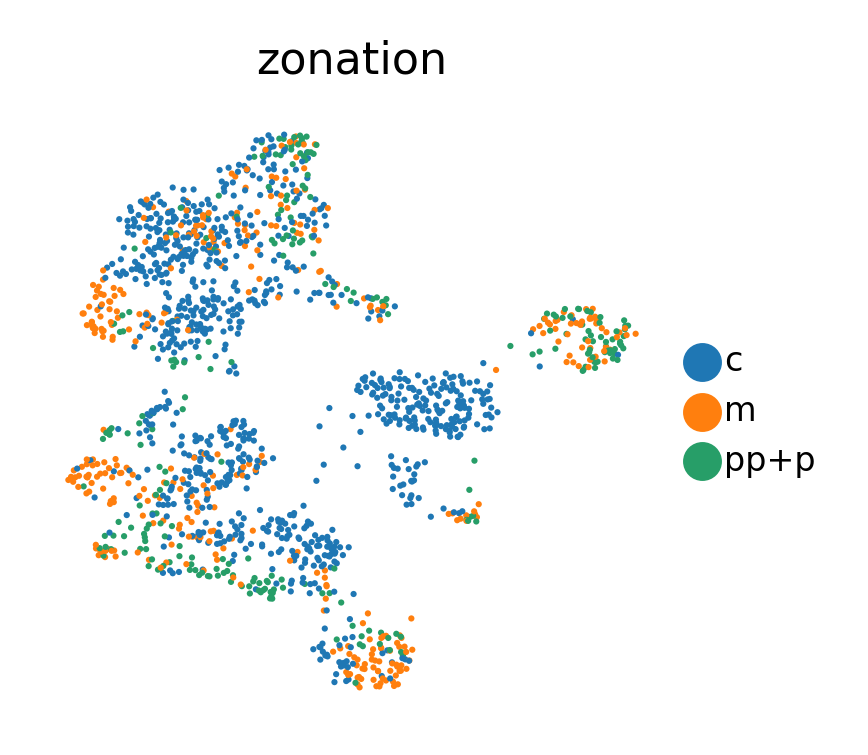

In [10]:
hep_latent.obs['zonation'] = list(hep_res)
sc.pp.neighbors(hep_latent, use_rep='X')
sc.tl.umap(hep_latent)
sc.settings.set_figure_params(dpi=200, figsize=(2,2), frameon=False, fontsize=8)
sc.pl.umap(hep_latent, color=['zonation'], size=50000 / latent.n_obs, legend_fontsize=6)
